In [6]:
import glob
import numpy as np
import sys
import importlib
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf


from skimage.morphology import area_opening

# Include path to my modules}
MY_UTILS_PATH = "../Modules/"
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
    
# Import my modules
import data_generator_mc_combined
importlib.reload(data_generator_mc_combined)
from data_generator_mc_combined import DataGenerator


import cs_models_mc_combined as fsnet
importlib.reload(fsnet)
import cs_models_mc_combined as fsnet

In [7]:
# Input parameters
H = 218
W = 170
channels = 24
batch_size = 8
nslices = 256
crop = (15, 15)

train_path = "../../MR_data/train_val_12_channel/Train/"
sampling_mask_path = "../Data/poisson_sampling/R10_218x170.npy"

In [8]:
train = glob.glob(train_path + "*.h5")
var_sampling_mask = np.load(sampling_mask_path)

asc = area_opening(var_sampling_mask[0], area_threshold=10, connectivity=1, parent=None, tree_traverser=None)

var_sampling_mask = np.repeat(var_sampling_mask[:, :, :, np.newaxis], 24, axis = -1) 

train_generator = DataGenerator(train, dim = (H, W), under_masks = var_sampling_mask,  crop = crop,\
                            batch_size = batch_size, n_channels = channels, nslices = nslices, shuffle=False, asc = asc)

sample = train_generator[10]
sensitivities = tf.convert_to_tensor(sample[0][3])
original_combined = tf.convert_to_tensor(sample[0][0])
original_channels = tf.convert_to_tensor(sample[0][1])

In [9]:
decoupled = fsnet.decouple_k_space(original_combined, sensitivities)
recombined = fsnet.combine_k_space(original_channels)

### Visualize original channel-wise masked data

(218, 170, 12)


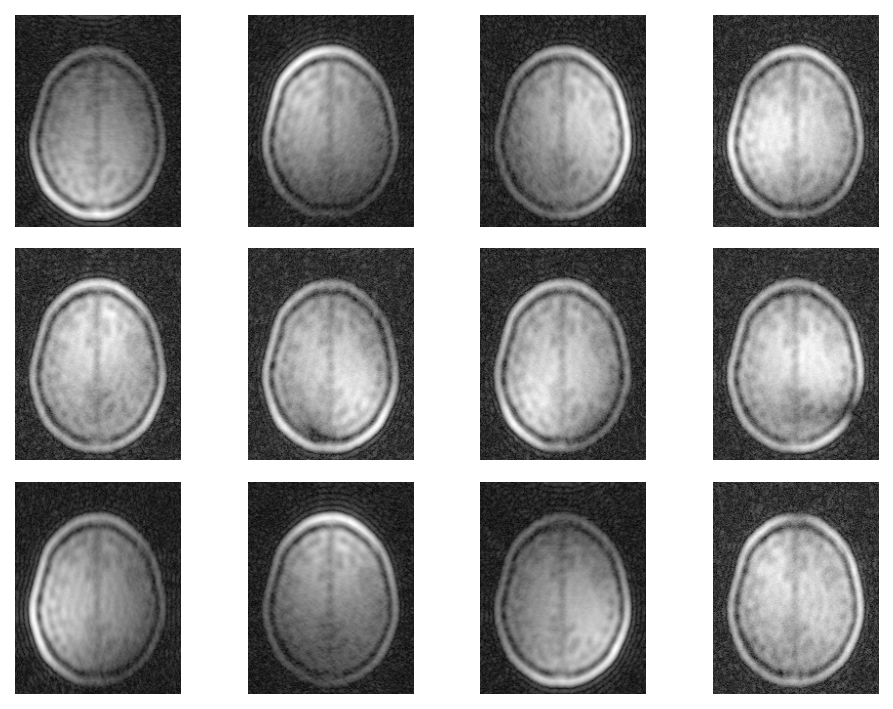

In [10]:

plt.figure(figsize = (8,6),dpi = 150)
gs1 = gridspec.GridSpec(3, 4)
gs1.update(wspace=0.002, hspace=0.1)

sample_img = original_channels.numpy()[1]
sample_img = sample_img[:,:,::2] + 1j*sample_img[:,:,1::2]
sample_img = np.fft.ifft2(sample_img,axes = (0,1))
print(sample_img.shape)
for ii in range(12):
    plt.subplot(gs1[ii])
    plt.imshow(np.sqrt(np.abs(sample_img[:,:,ii])),cmap = "gray")
    plt.axis("off")
plt.show()

### Visualize combined masked data

(218, 170, 2)
(218, 170, 1)


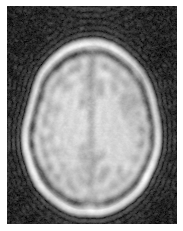

In [11]:
sample_img = sample[0][0][1]
print(sample_img.shape)
sample_img = sample_img[:,:,::2] + 1j*sample_img[:,:,1::2]
print(sample_img.shape)
sample_img = np.fft.ifft2(sample_img,axes = (0,1))



plt.imshow(np.sqrt(np.abs(sample_img)),cmap = "gray")
plt.axis("off")
plt.show()

### Visualize de-coupled channel-wise data

(218, 170, 12)


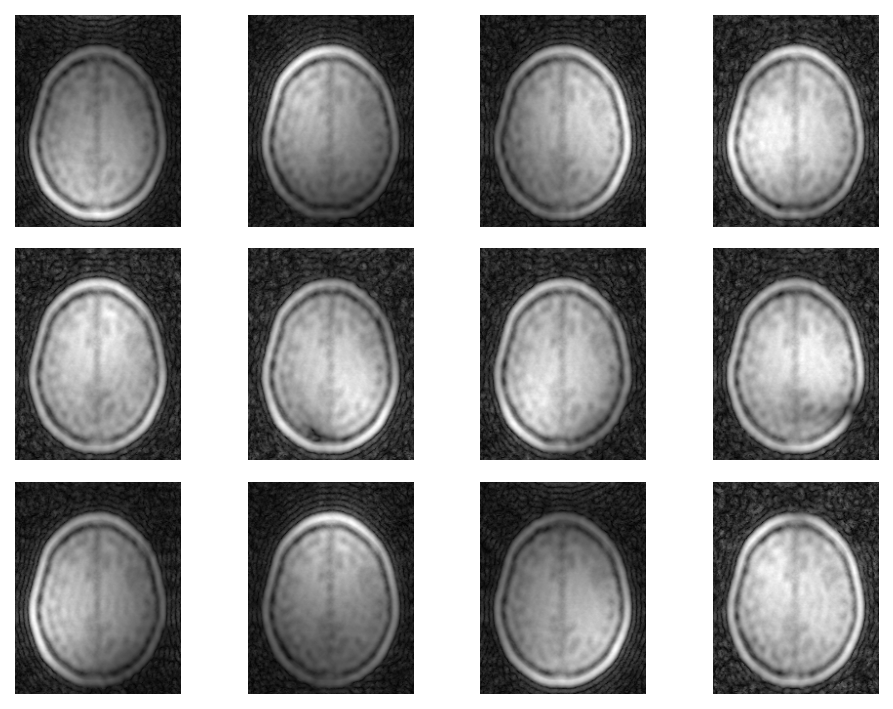

In [12]:
plt.figure(figsize = (8,6),dpi = 150)
gs1 = gridspec.GridSpec(3, 4)
gs1.update(wspace=0.002, hspace=0.1)

sample_img = decoupled.numpy()[1]
sample_img = sample_img[:,:,::2] + 1j*sample_img[:,:,1::2]
sample_img = np.fft.ifft2(sample_img,axes = (0,1))
print(sample_img.shape)
for ii in range(12):
    plt.subplot(gs1[ii])
    plt.imshow(np.sqrt(np.abs(sample_img[:,:,ii])),cmap = "gray")
    plt.axis("off")
plt.show()

### Visualize re-combined data

(218, 170, 2)


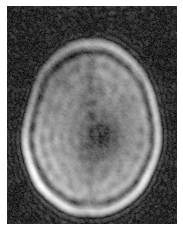

In [13]:
sample_img = recombined.numpy()[1]

print(sample_img.shape)
sample_img = sample_img[:,:,::2] + 1j*sample_img[:,:,1::2]
sample_img = np.fft.ifft2(sample_img,axes = (0,1))



plt.imshow(np.sqrt(np.abs(sample_img)),cmap = "gray")
plt.axis("off")
plt.show()
